In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

# Import our custom modules
from src.data_loader import H5DataLoader
from src.logic_preprocessing import Logic_PhysicsPreprocessor
from src.model import build_model
from src.utils import ModelEvaluator

In [3]:
# Initialize the robust loader
loader = H5DataLoader()

# Update paths to use the NEW merged files
current_signal = 'data/signal.h5'      
current_bkg = 'data/background.h5'  

# Load Data Dict
# The loader handles the shapes/renaming automatically now
data_dict = loader.get_data(signal_path=current_signal, background_path=current_bkg)

# Verify
print(f"Data components loaded: {list(data_dict.keys())}")
if 'event' in data_dict:
    print(f"Total Events: {len(data_dict['event'])}")

Loading Signal: data/signal.h5
Loading Background: data/background.h5
Combining datasets...
Data loaded. Keys: ['event', 'met', 'ditau', 'jet', 'lepton']
Data components loaded: ['event', 'met', 'ditau', 'jet', 'lepton']
Total Events: 600000


In [4]:
# Initialize with the dictionary
preprocessor= Logic_PhysicsPreprocessor(data_dict) # Pass the dict here

# 1. Apply Event Topology & Kinematic Cuts
# 2. Flatten & Merge
processed_df = preprocessor.process_pipeline()

# Get training splits
(X_train, y_train), (X_val, y_val), (X_test, y_test) = preprocessor.get_train_test_data()

print(f"Final Training Set size: {X_train.shape}")
print(f"Test Set size: {X_test.shape}")

Events passing cuts: 272831
Processed Columns (22): ['event_index', 'signal', 'met_et', 'met_phi', 'num_jet', 'num_bjet', 'num_ditau', 'jet_pt_1', 'jet_pt_2', 'jet_eta_1', 'jet_eta_2', 'jet_phi_1', 'jet_phi_2', 'bjet_pt_1', 'bjet_eta_1', 'bjet_phi_1', 'lepton_pt_1', 'lepton_eta_1', 'lepton_phi_1', 'ditau_pt_1', 'ditau_eta_1', 'ditau_phi_1']
Final Feature Shape: (272831, 33)
Final Training Set size: (190981, 33)
Test Set size: (40925, 33)


In [6]:
print('Signal to Backgroound ratio in Training Set:', y_train.value_counts(normalize=True))

Signal to Backgroound ratio in Training Set: signal
0    0.775538
1    0.224462
Name: proportion, dtype: float64


In [5]:
# 1. Determine input dimension from your data
input_dim = X_train.shape[1]

# 2. Instantiate the model
model = build_model(input_dim)

model.build(input_shape=(None, input_dim))

model.summary()

Model: "DiTauClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ init_dense (Dense)              │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ init_activation (PReLU)         │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ init_dropout (Dropout)          │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_0 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_0 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_0 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_1 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_1 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_1 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_2 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_2 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_3 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_3 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_3 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_4 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_4 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_4 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_5 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_5 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_5 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,649 (108.00 KB)

 Trainable params: 27,649 (108.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils import class_weight

# 1. Calculate Class Weights
# This balances the loss so the model treats both classes equally important
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(weights))
print(f"Computed Class Weights: {class_weight_dict}")

# 2. Train with Weights AND Smaller Batch Size
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('models/best_ditau_model.keras', save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=1024,           
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)
print("Training complete.")

Computed Class Weights: {0: np.float64(0.6543468706997788), 1: np.float64(2.119728335706117)}
Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8046 - loss: 0.4051 - val_accuracy: 0.8744 - val_loss: 0.2900
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8696 - loss: 0.3091 - val_accuracy: 0.8738 - val_loss: 0.2823
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8747 - loss: 0.2960 - val_accuracy: 0.8824 - val_loss: 0.2878
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8781 - loss: 0.2911 - val_accuracy: 0.8856 - val_loss: 0.2764
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8806 - loss: 0.2880 - val_accuracy: 0.8879 - val_loss: 0.2757
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8827 - loss: 0.2855 - val_accuracy: 0.8900 - val_loss: 0.2748
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8829 - loss: 0.2847 - val_accuracy: 0.8800 - val_loss: 0.2917
Epoch 8/25

1217/1217 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step
Training history saved to results\training_history.png


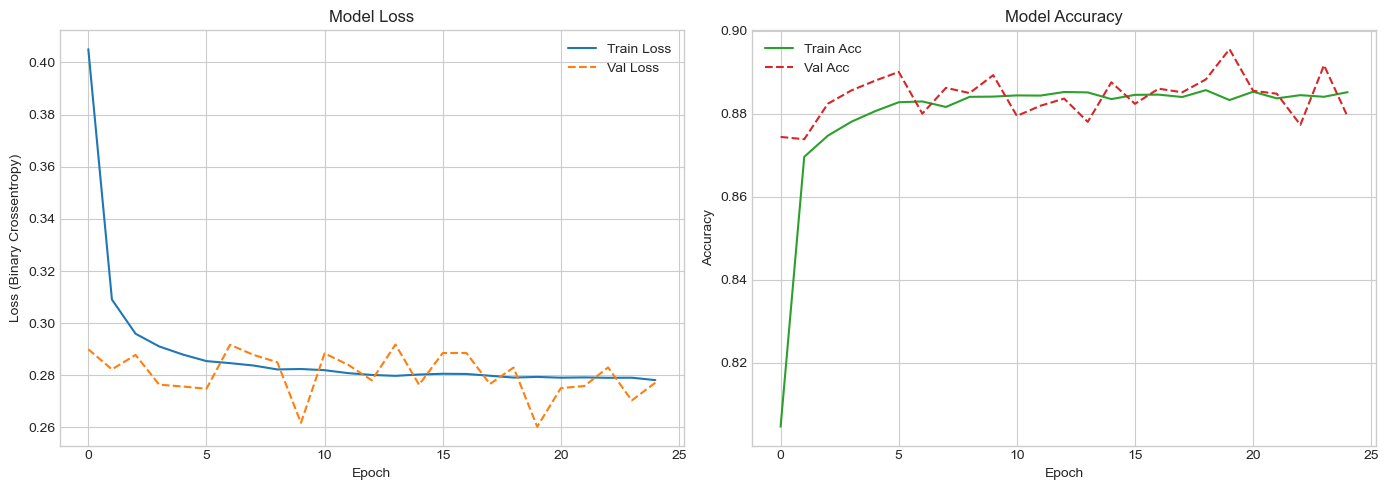

In [6]:
# Calculate predictions
y_pred = model.predict(X_test).ravel()

# Initialize our visualization toolkit
evaluator = ModelEvaluator(output_dir='results')

# 1. Plot Training History (Loss & Accuracy)
evaluator.plot_training_history(history)

ROC Curve saved to results\roc_curve.png


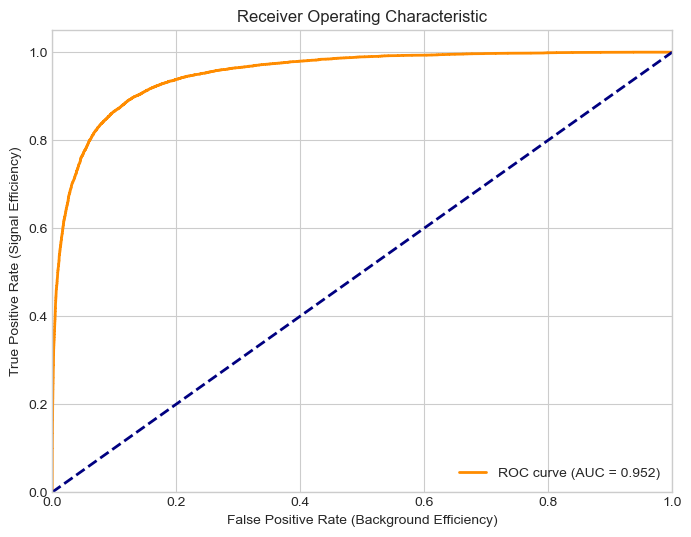

Final AUC Score: 0.9524


In [8]:
# 2. Plot ROC Curve (The most important metric for this paper)
auc_score = evaluator.plot_roc_curve(y_test, y_pred)

print(f"Final AUC Score: {auc_score:.4f}")

In [9]:
# 3. Confusion Matrix at threshold 0.5
evaluator.plot_confusion_matrix(y_test, y_pred, threshold=0.5)
evaluator.print_classification_report(y_test, y_pred)

Confusion Matrix saved to results\confusion_matrix.png

--- Classification Report ---
              precision    recall  f1-score   support

  Background       0.95      0.91      0.93     29824
      Signal       0.75      0.85      0.80      9101

    accuracy                           0.90     38925
   macro avg       0.85      0.88      0.86     38925
weighted avg       0.90      0.90      0.90     38925

